In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Load Excel file into a DataFrame
df = pd.read_csv("Dataset\daily_report.csv")

# Display DataFrame (table)
print(f"Number of Data Entries: {len(df)}")
df.head()

Number of Data Entries: 8664161


,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
0,457547,2023-01-01,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,474589,2023-01-01,0.0,0.56,0.56,0.0,0.0,0.0,0.0
2,504321,2023-01-01,0.0,2.03,2.03,0.0,0.0,0.0,0.0
3,504322,2023-01-01,0.0,0.51,0.51,0.0,0.0,0.0,0.0
4,504326,2023-01-01,0.0,0.01,0.01,0.0,0.0,0.0,0.0


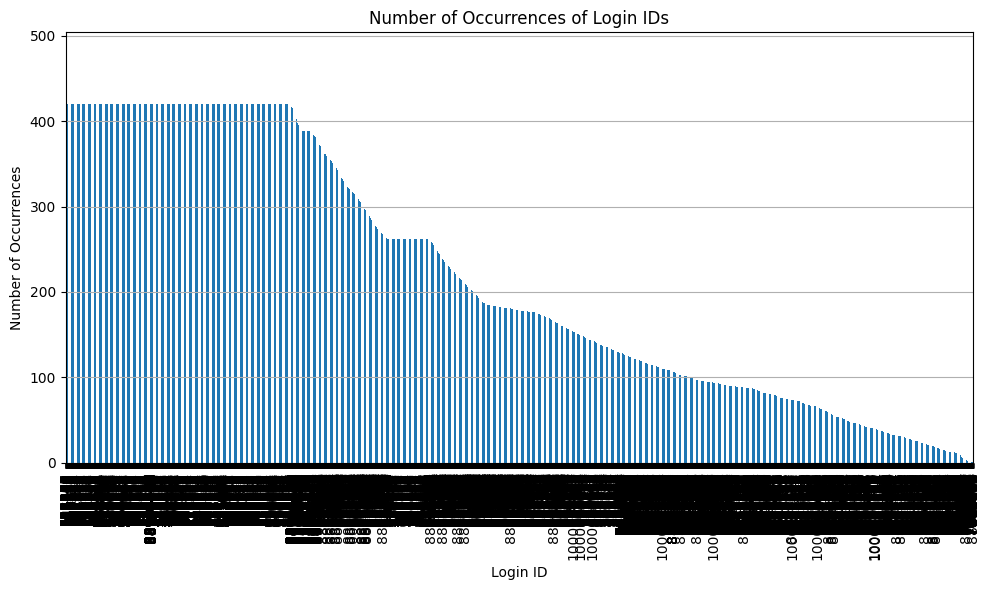

In [60]:
# Count occurrences of each login ID
login_counts = df['login'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
login_counts.plot(kind='bar')
plt.xlabel('Login ID')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Login IDs')
plt.grid(axis='y')

# Set y-axis limit
plt.ylim(0, login_counts.max() * 1.2)  # Adjust the multiplier (1.2) as needed

plt.tight_layout()
plt.show()

In [61]:
# Finding the 10 most occurring login fields
top_10_logins = df['login'].value_counts().head(10).index.tolist()

# Filtering the DataFrame based on the top 10 logins
top_10_df = df[df['login'].isin(top_10_logins)]

top_10_df.head()

,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
8292,523223,2023-01-01,0.0,5.86,5.86,0.0,0.0,0.0,0.0
8324,523280,2023-01-01,0.0,112.30,112.30,0.0,0.0,0.0,0.0
8325,523281,2023-01-01,0.0,0.03,0.03,0.0,0.0,0.0,0.0
8326,523284,2023-01-01,0.0,1490.42,1490.42,0.0,0.0,0.0,0.0
8327,523285,2023-01-01,0.0,509.68,509.68,0.0,0.0,0.0,0.0


In [62]:
# Convert 'record_time' column to datetime
top_10_df.loc[:, 'record_time'] = pd.to_datetime(top_10_df['record_time'])  # Use .loc to set values

# Sorting DataFrame by 'record_time'
top_10_df = top_10_df.sort_values(by='record_time')

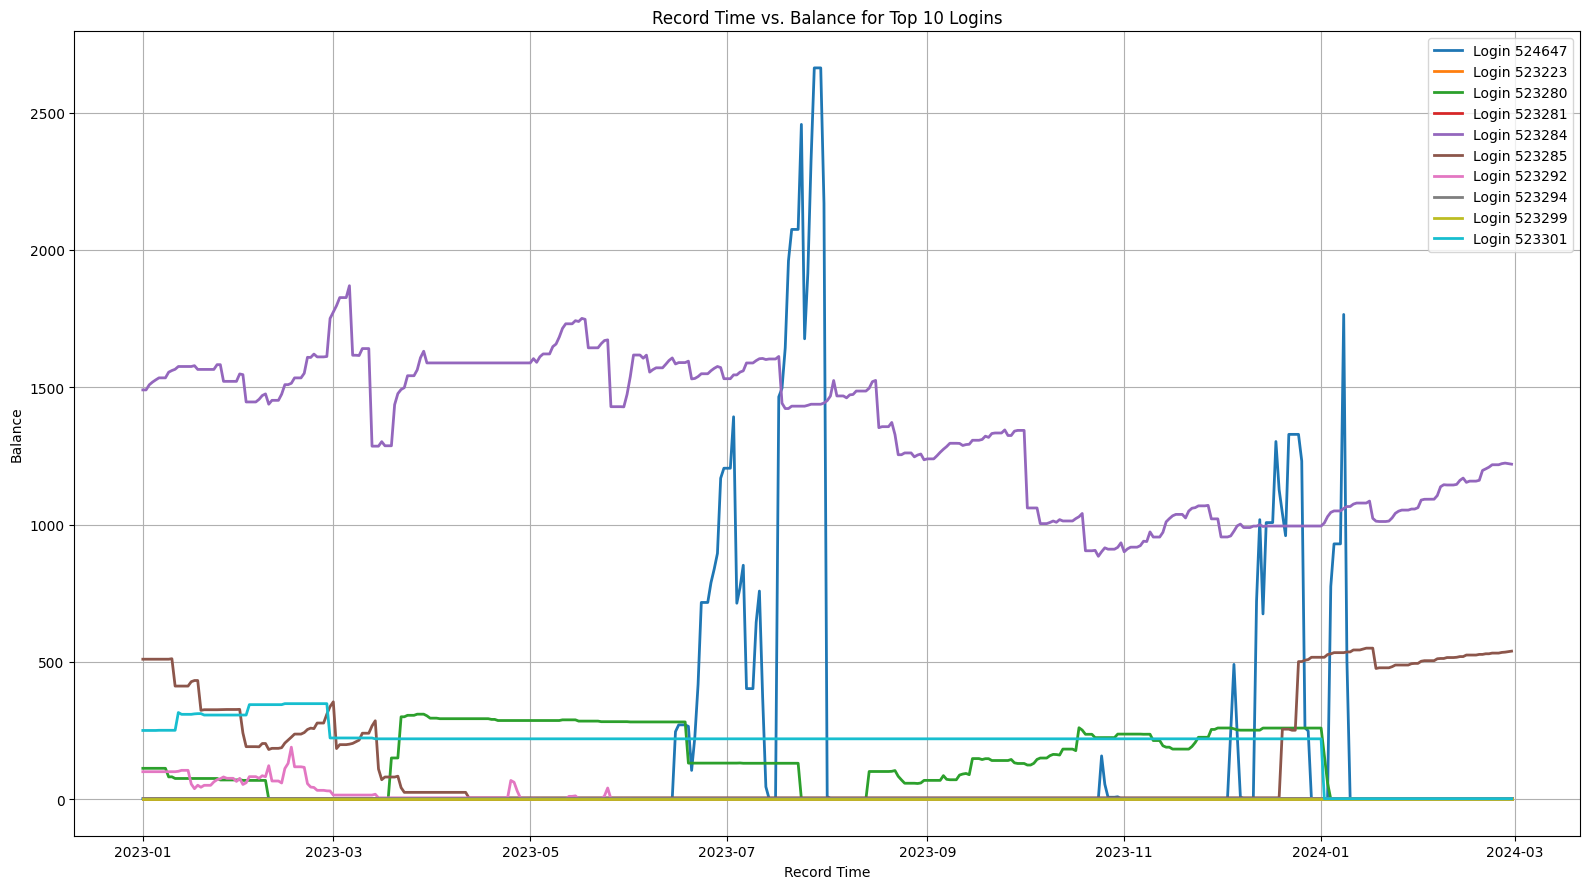

In [63]:
# Plotting
plt.figure(figsize=(16, 9))

# Iterate through each login and plot
for i, login in enumerate(top_10_logins):
    login_data = top_10_df[top_10_df['login'] == login]
    plt.plot(login_data['record_time'], login_data['balance'], label=f"Login {login}", linewidth=2)

plt.xlabel('Record Time')
plt.ylabel('Balance')
plt.title('Record Time vs. Balance for Top 10 Logins')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
